In [1]:
using Plots;
gr();

using StatsPlots
using Distributions

using LaTeXStrings
using Random

In [2]:

## base
w::Vector{Float64} = [0; 0]
k::Vector{Float64} = [0; 0]
n::Vector{Float64} = [0; 0]

q::Vector{Float64} = [0; 0]

m_0::Float64 = 0

## subs
l::Vector{Float64} = [0; 0]
ω::Vector{Float64} = [0; 0]


t_end = 5000

## vals
k[1] = 2
k[2] = 2

# Population cap (purely aesthetic if n₁ = n₂)
n[1] = 100
n[2] = 100

# w[1] = 0.015
# w[2] = 0.035

w[1] = 0.7
w[2] = 0.4

q[1] = 0.999
q[2] = 0.8


l[1] = k[1] / n[1]
l[2] = k[2] / n[1]

ω[1] = k[1] - w[1]
ω[2] = k[2] - w[2]

## initial values
c₁₀ = 0.99
c₂₀ = 1 - c₁₀

c::Vector{Float64} = [c₁₀; c₂₀]

state_vector = c

2-element Vector{Float64}:
 0.99
 0.010000000000000009

In [3]:
test_matrix::Matrix{Float64} = [(ω[1]-l[1]) w[1]; w[2] (ω[2]-l[2])]

# x_array = Vector{Union{Int,Missing}}(undef, t_end)
# y_array = Vector{Union{Int,Missing}}(undef, t_end)

x_array::Vector{Int} = zeros(t_end)
y_array::Vector{Int} = zeros(t_end)
t_array::Vector{Int} = 1:1:t_end

x_array[1] = 99
y_array[1] = 1

1

In [ ]:
is_c1 = true
is_c2 = false



time_modifier = [1]

#tau = [1]
#upsilon = [1]

1-element Vector{Int64}:
 1

In [5]:
Random.seed!(190622)
U = Uniform(0,1)
u = rand(U, (length(t_array[1:end-1]), 2))

4999×2 Matrix{Float64}:
 0.00226089  0.40655
 0.323445    0.659813
 0.207012    0.576227
 0.366904    0.148423
 0.886278    0.319947
 0.696317    0.467032
 0.952525    0.992725
 0.182353    0.182985
 0.0406811   0.249451
 0.931767    0.491732
 ⋮           
 0.504896    0.116051
 0.966131    0.0649895
 0.976809    0.380244
 0.572845    0.222473
 0.426959    0.909694
 0.788513    0.441584
 0.238937    0.860155
 0.991097    0.622167
 0.188771    0.794637

In [18]:
#while t_array[end] <= t_end

current_state = is_c1
for tau in t_array[1:end-1]
    local upsilon = tau + 1
    #println(tau)

    #local u = rand(U, 2)
    # while u[3] == 0
    #     u[3] = rand(U)
    # end



    # append!(x_array, x_array[tau])
    # append!(y_array, y_array[tau])

    #append!(t_array, t_array[tau])
    # scalar = (w[0] / w[1]) * c1_array[tau] + (w[0] / w[1]) * c2_array[tau]
    # time_modifier[1] = -np.log(u[2]) / scalar

    # time_modifier[1] = 0.002


    # t_array[upsilon] += time_modifier
    #
    x_array[upsilon] += x_array[tau]
    y_array[upsilon] += y_array[tau]

    if current_state == is_c1
        if u[tau,1] < test_matrix[1, 1]
            x_array[upsilon] += 1
            # y_array[upsilon] = y_array[tau]
        else
            # x_array[upsilon] = x_array[tau]
            y_array[upsilon] += 1

            global current_state = is_c2
        end
    elseif current_state == is_c2
        if u[tau,2] < test_matrix[2, 2]
            # x_array[upsilon] = x_array[tau]
            y_array[upsilon] += 1
        else
            x_array[upsilon] += 1
            # y_array[upsilon] = y_array[tau]

            global current_state = is_c1
        end
    end

    ## End of chain, increments at end of loop so arrays work properly
    #tau[1] += 1
end


In [19]:
sums = x_array + y_array

# println(sums)
# exit()

x::Vector{Float64} = x_array ./ sums;
y::Vector{Float64} = y_array ./ sums;

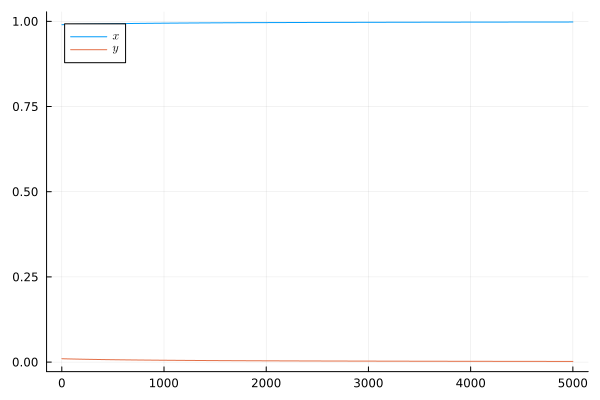

In [20]:
test_plot = plot(t_array, x; label=(L"x"))
plot!(t_array, y; label=(L"y"))
#plot!(t_array, y)


In [8]:


# savefig(test_plot, file_path)